## **First Question**

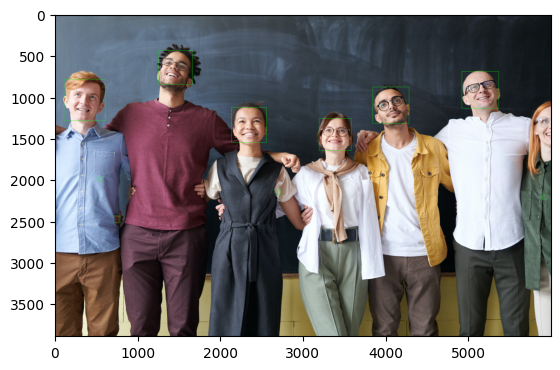

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Load the image.
image = cv2.imread("/content/image1.jpg")

# Convert the image to grayscale.
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the face cascade.
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")

# Detect faces in the image.
faces = face_cascade.detectMultiScale(grayscale_image, 1.2, 5, minSize=(50, 50))

# If no faces are found, try increasing the scale factor.
if len(faces) == 0:
    faces = face_cascade.detectMultiScale(grayscale_image, 1.2, 4)

# If no faces are found, try decreasing the minNeighbors parameter.
if len(faces) == 0:
    faces = face_cascade.detectMultiScale(grayscale_image, 1.1, 3)

# If no faces are found, try increasing the minSize parameter.
if len(faces) == 0:
    faces = face_cascade.detectMultiScale(grayscale_image, 1.1, 4, minSize=(20, 20))

# Draw a rectangle around each face.
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image.
plt.imshow(image[:,:,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
def gamma_transform(image, gamma=1.0):
    output = 255 * (image / 255) ** (1 / gamma)
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

In [ ]:
def logarithmic_transform(image, c=1.0):
    output = c * np.log(100000 + image)
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

In [ ]:
def linear_transform(image, a=1.0, b=0.0):
    output = a * image + b
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

In [ ]:
def non_linear_transform(image):
    output = x + 50*np.sin(image/10)
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

In [ ]:
for i in faces:
  print(i)

[1251  441  407  407]
[4912  692  445  445]
[108 788 498 498]
[3836  881  438  438]
[2130 1129  422  422]
[3189 1261  387  387]
[ 528 1966   53   53]
[2656 2116   67   67]
[5887 2186   57   57]
[ 704 2437   80   80]


In [ ]:
fs = []
for (x, y, w, h) in faces:
    face_arr = image[y:y+w,x:x+h,:]
    fs.append(face_arr)

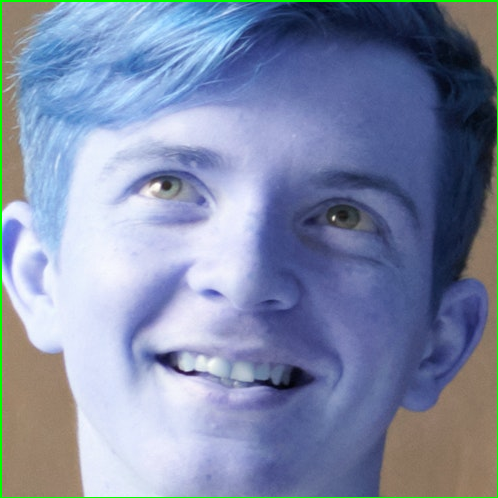

In [ ]:
from PIL import Image
import numpy as np

img = Image.fromarray(fs[2])
# Display the Numpy array as Image
img.show()

In [ ]:
fs_prime = []
for fac in fs:
  fs_prime.append(gamma_transform(fac, 5))

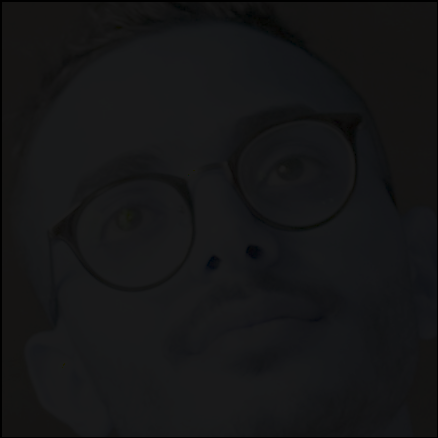

In [ ]:
img = Image.fromarray(fs_prime[3])
img.show()

In [ ]:
fs_prime_1 = []
for fac in fs:
  fs_prime_1.append(logarithmic_transform(fac, 13))

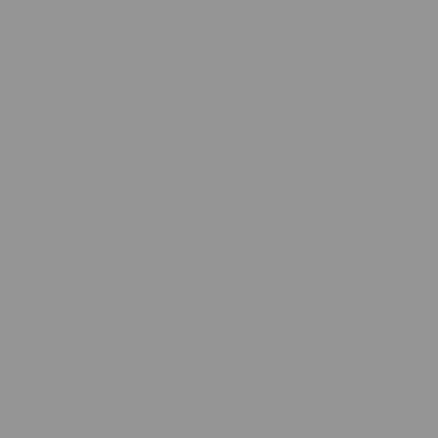

In [ ]:
img = Image.fromarray(fs_prime_1[3])
img.show()

In [ ]:
fs_prime_2 = []
for fac in fs:
  fs_prime_2.append(linear_transform(fac, 5, 0))

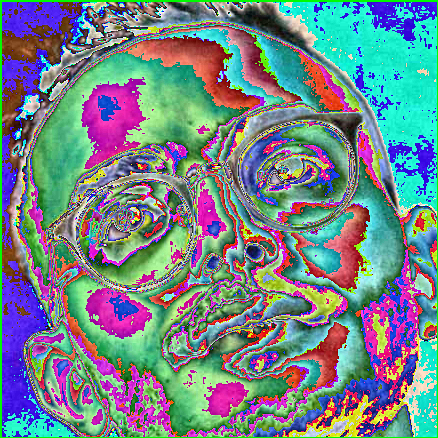

In [ ]:
img = Image.fromarray(fs_prime_2[3])
img.show()

In [ ]:
fs_prime_3 = []
for fac in fs:
  fs_prime_3.append(non_linear_transform(fac))

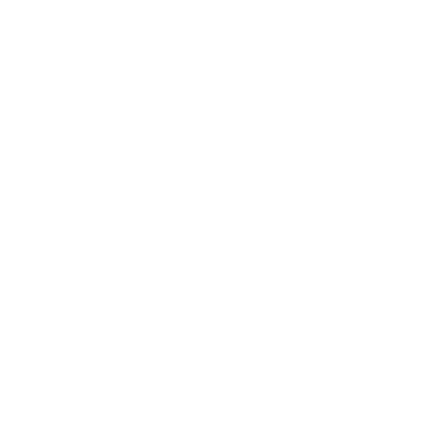

In [ ]:
img = Image.fromarray(fs_prime_3[3])
img.show()

## **The report**

https://docs.google.com/document/d/1BphWL9lkvwMlj9aEBgzrLMifs5K6DxiQb5KhMjd3l4k/edit?usp=sharing

## **Second Question**

In [52]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

In [58]:
def compress_image(image_file, number_of_colors):

  numpy_array = asarray(image_file)

  # Get the shape of the NumPy array
  shape = numpy_array.shape

  # Reshape the NumPy array to be a 2D array of pixels, where each pixel is represented by a 3-tuple of RGB values.
  reshaped_numpy_array = numpy_array.reshape((shape[0] * shape[1], 3))

  # Create a KMeans object with the desired number of clusters.
  kmeans = KMeans(n_clusters=number_of_colors)

  # Fit the KMeans object to the reshaped NumPy array.
  kmeans.fit(reshaped_numpy_array)

  # Get the cluster labels for each pixel.
  cluster_labels = kmeans.labels_

  # Create a new NumPy array with the same shape as the reshaped NumPy array.
  new_numpy_array = np.zeros_like(reshaped_numpy_array)

  # Iterate over the pixels in the reshaped NumPy array.
  for i, pixel in enumerate(reshaped_numpy_array):

    # Get the cluster label for the pixel.
    cluster_label = cluster_labels[i]

    # Assign the pixel to the cluster.
    new_numpy_array[i] = cluster_label

  # Create a new NumPy array with the same shape as the reshaped NumPy array.
  new_numpy_array = np.zeros_like(reshaped_numpy_array)

  # Iterate over the pixels in the reshaped NumPy array.
  for i, pixel in enumerate(reshaped_numpy_array):

    # Get the cluster label for the pixel.
    cluster_label = cluster_labels[i]


    # Get the color of the cluster.
    cluster_centers=kmeans.cluster_centers_
    color = cluster_centers[cluster_label]

    # Assign the color to the pixel.
    new_numpy_array[i] = color

  # Save the image to the file.
  img = Image.fromarray(new_numpy_array)

  img.show()
  # img.save('/content/drive/MyDrive/Digital Image Processing/Assingment 1/new_image.jpeg')
  
  return np.array(Image.fromarray(new_numpy_array))



In [59]:

img =  np.array(Image.open('/content/drive/MyDrive/Digital Image Processing/Assingment 1/image2.jpg'))

plt.imshow(compress_image(img, 16)[:,:,::-1])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: ignored